1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

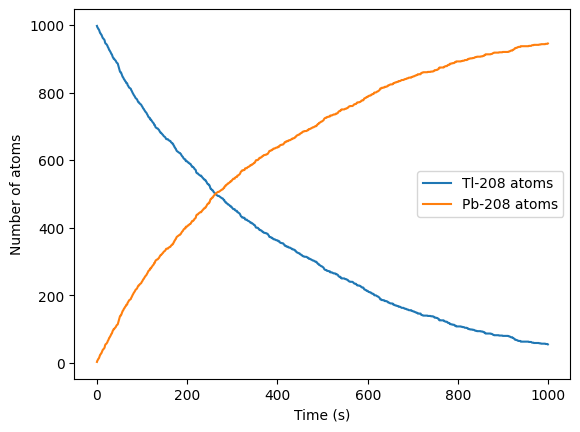

In [1]:
import numpy as np

import matplotlib.pyplot as plt


half_life = 3.052 * 60  # half-life in seconds
tau = half_life / np.log(2)
time_steps = 1  # time step in seconds
total_time = 1000  # total time in seconds

Tl_atoms = 1000
Pb_atoms = 0

Tl_atoms_over_time = []
Pb_atoms_over_time = []

# Simulation
for t in range(0, total_time, time_steps):
    decay_probability = 1 - 2**(-time_steps / tau)
    decayed_atoms = np.random.binomial(Tl_atoms, decay_probability)
    Tl_atoms -= decayed_atoms
    Pb_atoms += decayed_atoms
    Tl_atoms_over_time.append(Tl_atoms)
    Pb_atoms_over_time.append(Pb_atoms)


# Plotting
time = np.arange(0, total_time, time_steps)
plt.plot(time, Tl_atoms_over_time, label='Tl-208 atoms')
plt.plot(time, Pb_atoms_over_time, label='Pb-208 atoms')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

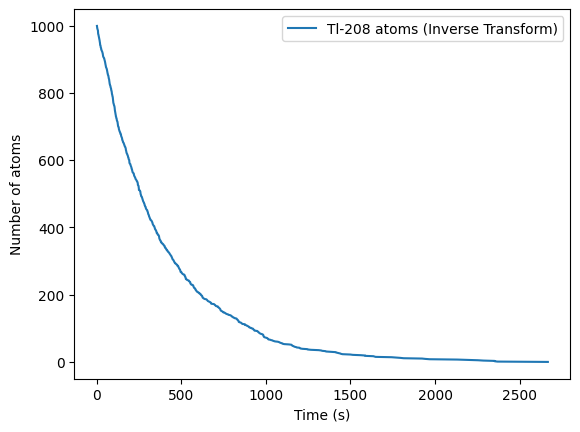

In [2]:
decay_times = -tau * np.log2(np.random.rand(1000))

# Sort decay times
decay_times.sort()

Tl_atoms_inverse = 1000 - np.arange(1, 1001)

# Plotting
plt.plot(decay_times, Tl_atoms_inverse, label='Tl-208 atoms (Inverse Transform)')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [ ]:
def calculate_scattering_angle(Z, e, epsilon_0, E, b):
    half_theta = np.arctan((Z * e**2) / (2 * np.pi * epsilon_0 * E * b))
    return 2 * half_theta

In [10]:
energy = 7.7 # MeV
particles = 1000000
a0 = 5.29e-11 # m (Bohr radius)
sigma = a0 / 100

def generate_scattering_angle():
    return np.random.uniform(0, 2 * np.pi)

def generate_impact_parameter():
    return np.random.normal(0, sigma)

def generate_energy_loss():
    return np.random.exponential(energy)

def generate_scattering():
    theta = generate_scattering_angle()
    b = generate_impact_parameter()
    E = generate_energy_loss()
    return theta, b, E

def calculate_scattering_angle(theta, b):
    return np.arctan(b / (np.tan(theta)))


def calculate_final_energy(E, theta):
    return E / (1 + E / energy * (1 - np.cos(theta)))

def calculate_differential_cross_section(theta):
    return (1 / (4 * energy * np.sin(theta / 2)**4))

def calculate_total_cross_section():
    return np.pi * sigma**2

def calculate_scattering():
    theta, b, E = generate_scattering()
    theta_s = calculate_scattering_angle(theta, b)
    E_f = calculate_final_energy(E, theta_s)
    return theta_s, E_f

def calculate_scattering_distribution():
    theta_s, E_f = np.zeros(particles), np.zeros(particles)
    for i in range(particles):
        theta_s[i], E_f[i] = calculate_scattering()
    return theta_s, E_f

theta_s, E_f = calculate_scattering_distribution()

# Plotting
plt.hist(theta_s, bins=100, density=True, alpha=0.75, label='Scattering angle')
plt.xlabel('Angle (rad)')
plt.ylabel('Probability')
plt.legend()
plt.show()
# Plotting the final energy distribution
plt.hist(E_f, bins=100, density=True, alpha=0.75, label='Final energy')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.legend()
plt.show()






TypeError: calculate_scattering_angle() missing 3 required positional arguments: 'epsilon_0', 'E', and 'b'

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84